In [1]:
from neural_network.neural_network import NeuralNetwork
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Importing data

In [2]:
# First we import the iris data:
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(iris, sep=',')

attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
print('The following classes are present in the data:', df['class'].value_counts())

The following classes are present in the data: Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64


# Preparing data

In [4]:
# Convert strings to ints:
df['label'] = pd.factorize(df['class'])[0]
# Creating instance of one-hot-encoder:
encoder = OneHotEncoder(handle_unknown='ignore')
# Perform one-hot encoding on 'label' column
encoder_df = pd.DataFrame(encoder.fit_transform(df[["label"]]).toarray())
# Merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)
final_df.drop(["sepal_length", "sepal_width", "petal_length", "petal_width", "class", "label"], axis=1, inplace=True)

In [5]:
X = np.array(df[["sepal_length", "sepal_width", "petal_length", "petal_width"]])
y = np.array(final_df)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

# Reshape datasets
X_train = np.swapaxes(X_train, 0, 1)
X_test = np.swapaxes(X_test, 0, 1)
y_train = np.swapaxes(y_train, 0, 1)
y_test = np.swapaxes(y_test, 0, 1)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (4, 99)
y_train shape: (3, 99)
X_test shape: (4, 50)
y_test shape: (3, 50)


In [6]:
# Create neural network:
input_dim = X_train.shape[0]
output_dim = df['class'].nunique()
layers_dims = [input_dim, 8, output_dim]  # 4-layer model

nn = NeuralNetwork(learning_rate=0.0075, 
                   layers_dims=layers_dims,
                   num_iterations=1500, 
                   activation='sigmoid',
                   loss='categorical-cross-entropy')

In [7]:
nn.fit(X_train, y_train)

Cost after iteration 0: 0.966
Cost after iteration 100: 0.683
Cost after iteration 200: 0.583
Cost after iteration 300: 0.527
Cost after iteration 400: 0.492
Cost after iteration 500: 0.467
Cost after iteration 600: 0.445
Cost after iteration 700: 0.426
Cost after iteration 800: 0.408
Cost after iteration 900: 0.391
Cost after iteration 1000: 0.374
Cost after iteration 1100: 0.358
Cost after iteration 1200: 0.342
Cost after iteration 1300: 0.325
Cost after iteration 1400: 0.31
Cost after iteration 1499: 0.294
Execution time in seconds: 0.16


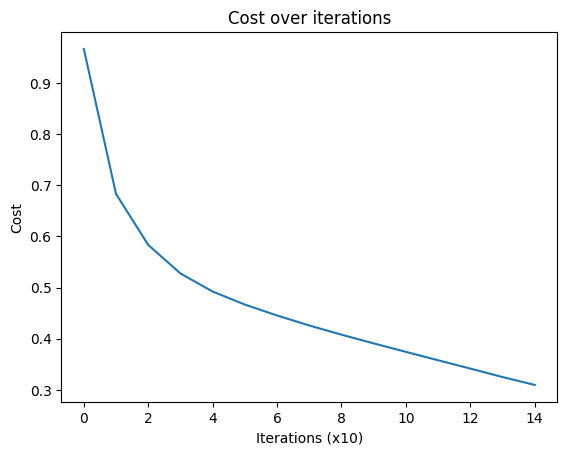

In [8]:
# Plot cost over time:
fig, ax = plt.subplots()
ax.plot(nn.costs)
ax.set(xlabel='Iterations (x10)', ylabel='Cost', title='Cost over iterations')
plt.show()

In [9]:
# Test model:
pred_test = nn.test(X_test, y_test)

Test accuracy: 0.94
